<a href="https://colab.research.google.com/github/DhritiGupta2006/Telco_Customer_Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Environment Setup


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
accuracy_score,
confusion_matrix,
classification_report,
roc_auc_score,
roc_curve,
precision_recall_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. Data Loading

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2. Basic Data Exploration

In [6]:
# Shape of dataset (rows, columns)
print("\nDataset Shape:", df.shape)


Dataset Shape: (7043, 21)


In [7]:
# First 5 rows
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [8]:
# Last 5 rows
print(df.tail())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes  

In [9]:
# Column names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [10]:
# Data types
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [11]:
# Dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
# Statistical summary of numerical columns
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [14]:
# Unique values in each column
for col in df.columns:
    print(col, ":", df[col].nunique())

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


In [15]:
# Target variable distribution
print("\nChurn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True))


Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


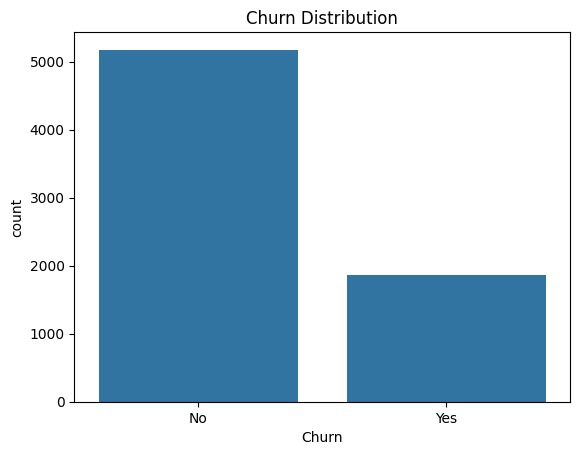

In [16]:
# Plot churn distribution
plt.figure()
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

In [17]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns

In [18]:
# Categorical columns analysis
print("\nCategorical Columns Analysis:")
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Categorical Columns Analysis:

Value counts for customerID:
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

Value counts for gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value counts for Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value counts for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value counts for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Value counts for InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Value counts for OnlineSecurity:
OnlineSecurity
No                

In [19]:
# Numerical columns analysis
print("\nNumerical Columns Analysis:")
for col in numerical_cols:
    print(f"\nStatistics for {col}:")
    print(df[col].describe())


Numerical Columns Analysis:

Statistics for SeniorCitizen:
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

Statistics for tenure:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Statistics for MonthlyCharges:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


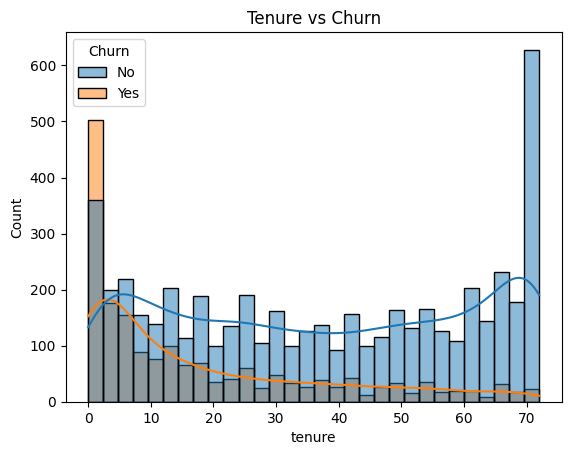

In [20]:
# Tenure vs Churn
plt.figure()
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Tenure vs Churn")
plt.show()

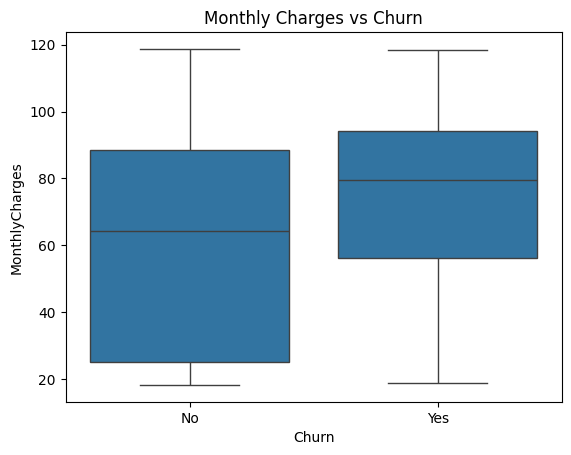

In [21]:
# MonthlyCharges vs Churn
plt.figure()
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

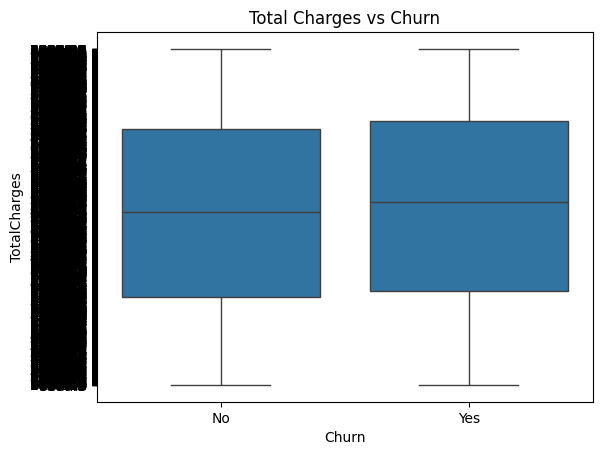

In [22]:
# TotalCharges vs Churn
plt.figure()
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.show()

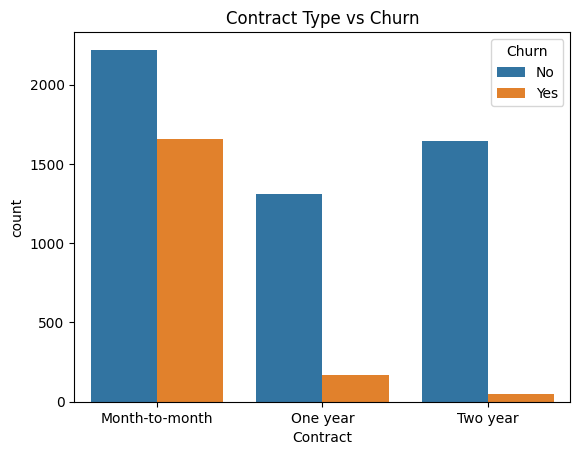

In [23]:
# Contract vs Churn
plt.figure()
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()

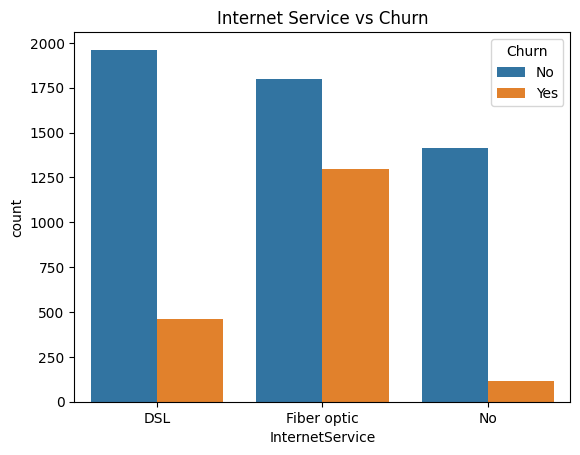

In [24]:
# InternetService vs Churn
plt.figure()
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service vs Churn")
plt.show()

# 5. Data Cleaning

In [25]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [26]:
# Fill missing values using median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [27]:
# Remove customerID (not useful for ML)
df.drop('customerID', axis=1, inplace=True)

In [28]:
# Encode target variable (Yes -> 1, No -> 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [29]:
# Encode categorical features using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le   # store encoders for future use

# 6. Correlation Analysis

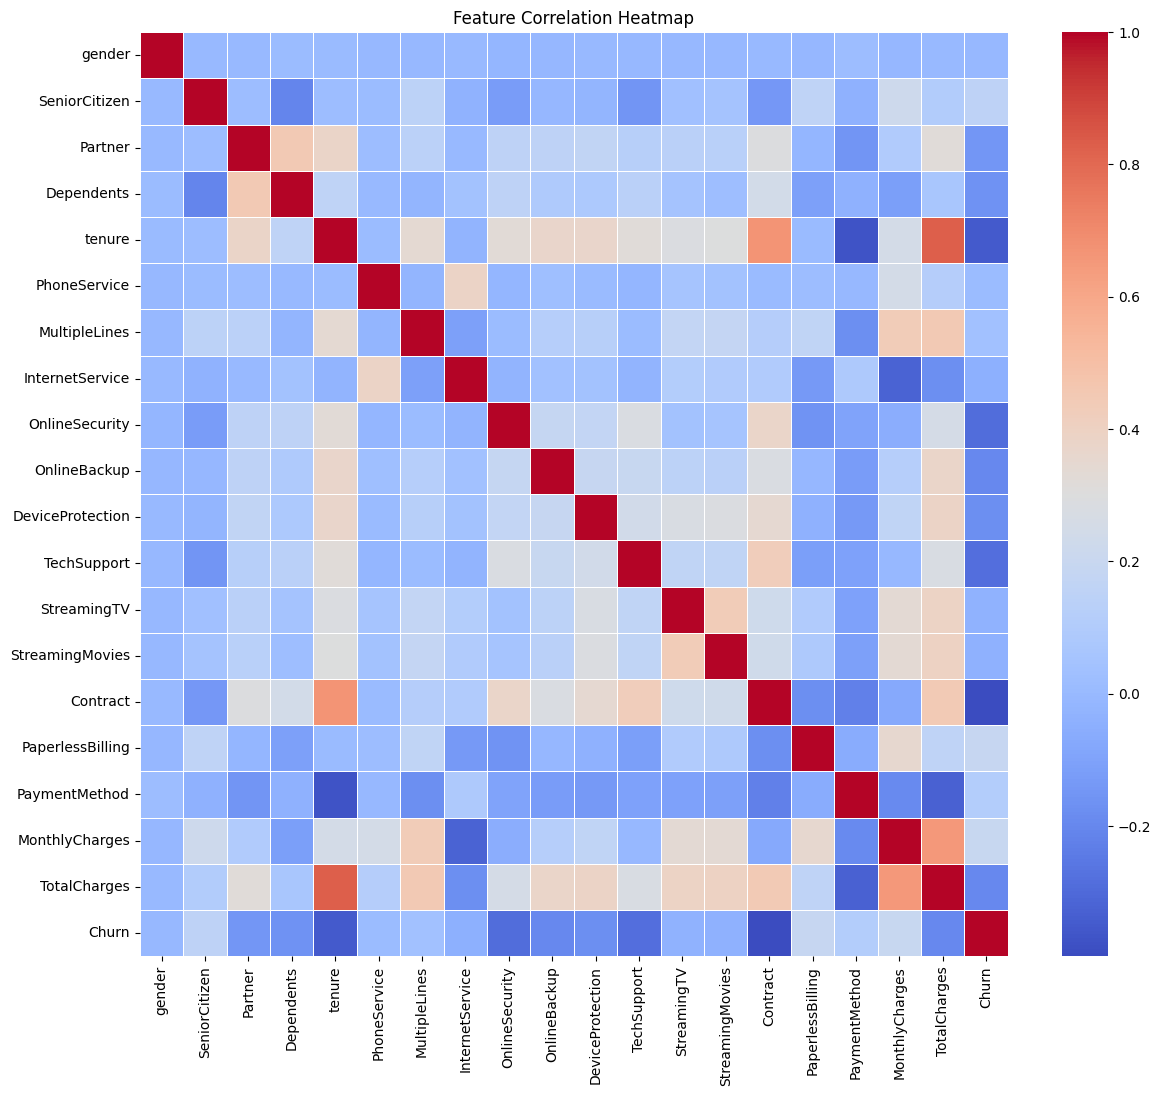

In [30]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 7. Feature-Target Split

In [31]:
X = df.drop('Churn', axis=1)   # Features
y = df['Churn']                # Target

# 8. Train-Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # maintain churn ratio
)

# 9. Feature Scaling

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#10. Logistic Regression

In [35]:
baseline_model = LogisticRegression(max_iter=2000)
baseline_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [36]:
# Predictions
y_pred_base = baseline_model.predict(X_test_scaled)
y_prob_base = baseline_model.predict_proba(X_test_scaled)[:,1]


In [37]:
# Evaluation
base_acc = accuracy_score(y_test, y_pred_base)
base_auc = roc_auc_score(y_test, y_prob_base)

print("\nBaseline Accuracy:", base_acc)
print("Baseline ROC-AUC:", base_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_base))


Baseline Accuracy: 0.7991483321504613
Baseline ROC-AUC: 0.8402800382340025

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



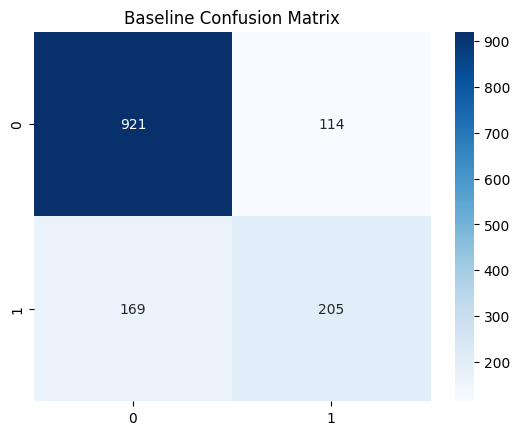

In [38]:
# Confusion Matrix
cm_base = confusion_matrix(y_test, y_pred_base)
plt.figure()
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues')
plt.title("Baseline Confusion Matrix")
plt.show()

#  11. Random Forest

In [39]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=300, random_state=42)

In [40]:
# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

In [41]:
# Evaluation
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_prob_rf)

print("\nRandom Forest Accuracy:", rf_acc)
print("Random Forest ROC-AUC:", rf_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7998580553584103
Random Forest ROC-AUC: 0.8317393887726369

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



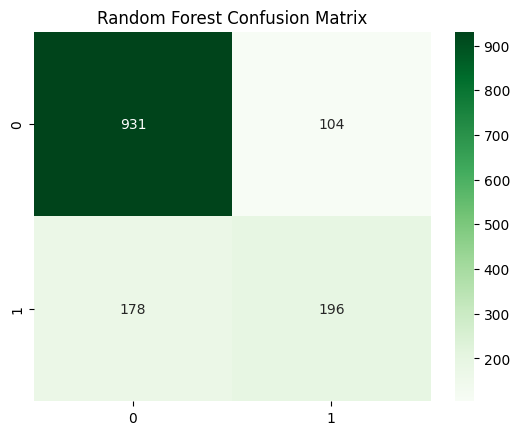

In [42]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

# 12. Error Analysis

In [43]:
print("Baseline Accuracy:", base_acc)
print("Random Forest Accuracy:", rf_acc)
print("Baseline ROC-AUC:", base_auc)
print("Random Forest ROC-AUC:", rf_auc)

Baseline Accuracy: 0.7991483321504613
Random Forest Accuracy: 0.7998580553584103
Baseline ROC-AUC: 0.8402800382340025
Random Forest ROC-AUC: 0.8317393887726369


# 13. Feature Importance

In [44]:
importances = rf_model.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

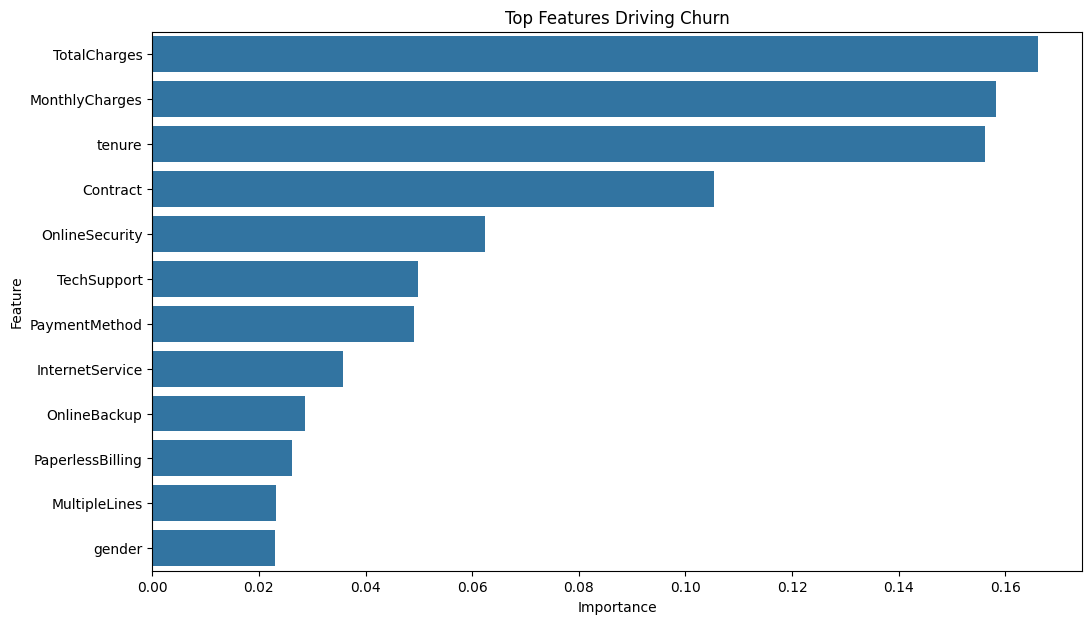


Top Features Driving Churn:

             Feature  Importance
18      TotalCharges    0.166139
17    MonthlyCharges    0.158184
4             tenure    0.156283
14          Contract    0.105323
8     OnlineSecurity    0.062369
11       TechSupport    0.049884
16     PaymentMethod    0.049011
7    InternetService    0.035778
9       OnlineBackup    0.028662
15  PaperlessBilling    0.026188
6      MultipleLines    0.023180
0             gender    0.023103


In [45]:
# Plot top features
plt.figure(figsize=(12,7))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(12))
plt.title("Top Features Driving Churn")
plt.show()

print("\nTop Features Driving Churn:\n")
print(feat_imp.head(12))
